In [1]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Capstone project"

CleverTap_Capstone_EDA_Model.ipynb	       Clever_Tap_EDA_google.ipynb
CleverTap_Capstone_Master_Data_Notebook.ipynb  Clever_Tap_Master_Data.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt
import datetime

pd.set_option('display.max_columns',200)
                        
master_data = pd.read_csv('/content/drive/My Drive/Capstone project/Clever_Tap_Master_Data.csv')
master_data.drop('Unnamed: 0',axis=1,inplace=True)
master_data['Last_Login_Time'] = pd.to_datetime(master_data['Last_Login_Time'],format='%Y-%m-%d')

master_data.head()

,UserId,Registered_Status,No_of_Devices,No_of_Uninstalled_Device,Last_Login_Time,Last_Login_Device,Last_Login_OS,Country,State,Other_Genre,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,Concerts,Cooking,Crime,Current Affairs / General,Documentary,Drama,Entertainment,Entertainment News,Equestrian,Family,Fashion,Food,Football,Game Show,General,Golf,Hockey,Horror,Horror / Supernatural,Martial Sports,Motor Sports,Music,Musical / Opera,Mystery,Other Sports (General),Others,Reality,Reality Show,Religious,Romance,Series,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Unknown,Variety,Wrestling,Channels,Movies,TV Shows,No_of_AppLaunches,No_of_UTMLaunches,q1,q2,q3,q4,No_of_Videos_Watched,Average_visit_duration,Reinstalled,Other_video_ratio,Action _video_ratio,Adventure _video_ratio,Animation _video_ratio,Anime _video_ratio,Athletics _video_ratio,Automotive _video_ratio,Award Show _video_ratio,Badminton _video_ratio,Comedy _video_ratio,Concerts _video_ratio,Cooking _video_ratio,Crime _video_ratio,Current Affairs / General _video_ratio,Documentary _video_ratio,Drama _video_ratio,Entertainment _video_ratio,Entertainment News _video_ratio,Equestrian _video_ratio,Family _video_ratio,Fashion _video_ratio,Food _video_ratio,Football _video_ratio,Game Show _video_ratio,General _video_ratio,Golf _video_ratio,Hockey _video_ratio,Horror _video_ratio,Horror / Supernatural _video_ratio,Martial Sports _video_ratio,Motor Sports _video_ratio,Music _video_ratio,Musical / Opera _video_ratio,Mystery _video_ratio,Other Sports (General) _video_ratio,Others _video_ratio,Reality _video_ratio,Reality Show _video_ratio,Religious _video_ratio,Romance _video_ratio,Series _video_ratio,Special Event _video_ratio,Sports Magazine _video_ratio,TV Shows (General) _video_ratio,Talk Show _video_ratio,Team Sports (Excl. Football) _video_ratio,Tennis / Squash _video_ratio,Thriller _video_ratio,Travel _video_ratio,Unknown _video_ratio,Variety _video_ratio,Wrestling _video_ratio,Dormant
0,a27134c322d4f56dabc106a6847cb96b,N,1.0,0.0,2017-01-06,1.0,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,342.0,0.0,0.0,0.0,1.0,0.0,1.0,0.040189,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
1,aab39ad0874c59cc388525d511667f9d,N,1.0,0.0,2017-03-01,1.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,11.173333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000727,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,f717dc3f757dc18cc0c3f27ed3e94ef8,N,2.0,2.0,2017-06-11,2.0,2.0,1.0,35.0,28.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,0.0,34.0,3.0,0.0,0.0,0.0,4.0,6.0,53.0,0.0,1.0,0.0,0.0,4.0,3.0,6.0,50.0,0.0,0.0,0.0,18.0,0.0,0.0,4.0,0.0,3.0,2.0,1.0,113.0,9.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,395.0,8.0,11.0,106.0,0.0,13.0,53.0,28.0,320.0,414.0,7.994159,1.0,1.0,0.026316,0.0,0.0,0.011254,0.0,0.0,0.0,0.333333,0.004464,0.0,0.0,0.0,0.5,0.0,0.006541,0.066667,0.0,0.0,0.0,0.25,0.5,1.0,0.0,0.5,0.0,0.0,0.028169,1.0,1.5,0.5,0.0,0.0,0.0,1.333333,0.0,0.0,0.028037,0.0,0.010526,0.5,0.5,0.6,0.6,0.0,0.0,0.333333,0.033333,0.0,0.0,0.0,0.0,0
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,N,1.0,0.0,2017-01-10,2.0,2.0,1.0,40.0,0.0,0.0,

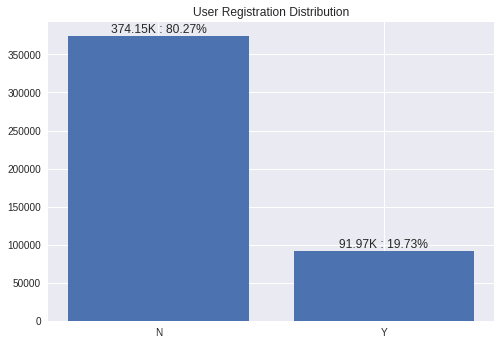

In [4]:
plt.bar(master_data.groupby('Registered_Status').size().index,master_data.groupby('Registered_Status').size())
plt.title('User Registration Distribution')
for x,y in zip(master_data.groupby('Registered_Status').size().index,master_data.groupby('Registered_Status').size()):
    plt.text(x,y, '{:.2f}'.format(y/1000) + 'K : ' + '{:.2f}'.format(y/master_data.shape[0]*100) + '%' , horizontalalignment='center',verticalalignment='bottom' )

Text(0.5, 1.0, 'No of devices used by User')

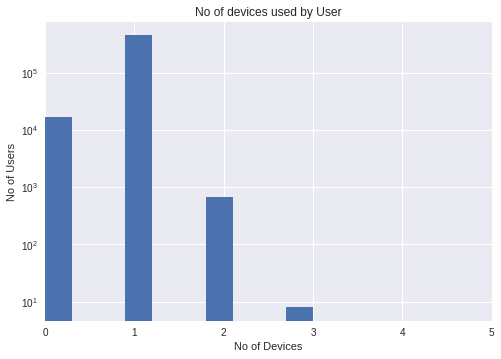

In [5]:
plt.hist(master_data['No_of_Devices'],log=True)
plt.xlabel('No of Devices')
plt.ylabel('No of Users')
plt.xlim([0,5])
plt.title('No of devices used by User')

Text(0.5, 1.0, 'Active / Dormat User ')

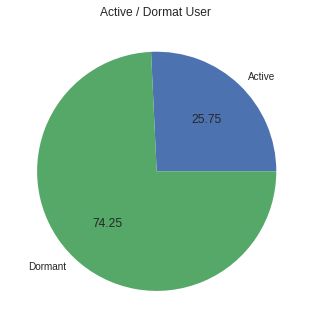

In [6]:
plt.pie(master_data.groupby('Dormant').size(),labels=['Active','Dormant'], autopct='%.2f')
plt.title('Active / Dormat User ')

Text(0, 0.5, 'No of Users')

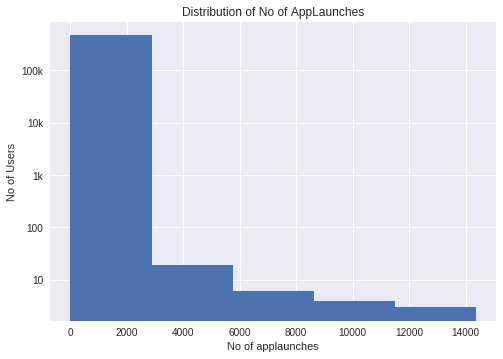

In [7]:
plt.hist(master_data['No_of_AppLaunches'],bins=5,log=True )
plt.yticks([10,100,1000,10000,100000],['10','100','1k','10k','100k'
])
plt.title('Distribution of No of AppLaunches')
plt.xlabel('No of applaunches')
plt.ylabel('No of Users')

q1    229791.0
q2    276253.0
q3    478271.0
q4    592560.0
dtype: float64

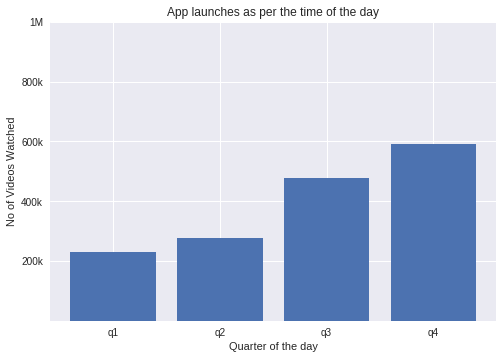

In [8]:
plt.bar(master_data[['q1','q2','q3','q4']].sum().index,master_data[['q1','q2','q3','q4']].sum())
plt.yticks([200000,400000,600000,800000,1000000],['200k','400k','600k','800k','1M'
])
plt.title('App launches as per the time of the day')
plt.xlabel('Quarter of the day')
plt.ylabel('No of Videos Watched')
master_data[['q1','q2','q3','q4']].sum()

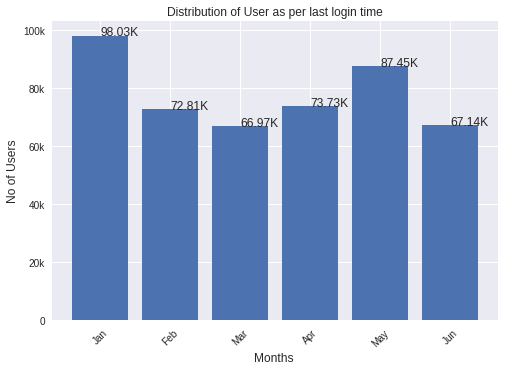

In [9]:
plt.bar(['Jan','Feb','Mar','Apr','May','Jun'],master_data.Last_Login_Time.dt.month.value_counts().sort_index())
plt.title('Distribution of User as per last login time')
plt.yticks(range(0,100001,20000),['0','20k','40k','60k','80k','100k'
])
plt.xlabel('Months ',{'fontsize':'medium'})
plt.ylabel('No of Users',{'fontsize':'medium'})
plt.xticks(rotation=45)
for x,y in zip(['Jan','Feb','Mar','Apr','May','Jun'],master_data.Last_Login_Time.dt.month.value_counts().sort_index()):
  plt.text(x,y,'{:.2f}'.format(y/1000)+'K',verticalalignment='bottom',horizontalalignment='left')

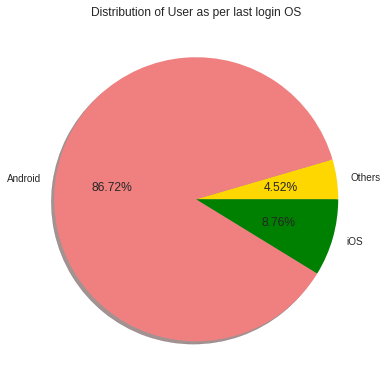

In [10]:
OS = [ 'Others', 'Android', 'iOS', 'Windows','Mac','BlackBerry', 'Linux']
colors = ['gold', 'lightcoral', 'green']

plt.pie(master_data.Last_Login_OS.value_counts().sort_index(),labels=OS[:3],autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('Distribution of User as per last login OS')
plt.xticks(rotation=45)
plt.tight_layout()

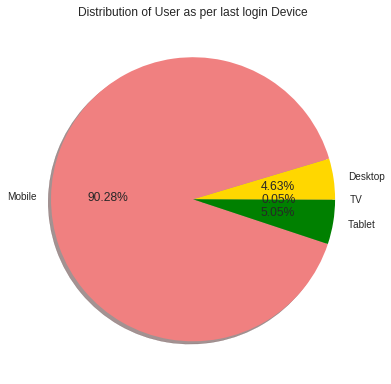

In [11]:
devices = ['Desktop','Mobile','Tablet','TV']

plt.pie(master_data.Last_Login_Device.value_counts().sort_index(),
        labels=devices,autopct='%1.2f%%', 
        shadow=True,
        colors=colors)
plt.title('Distribution of User as per last login Device')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'No of Videos watched per user')

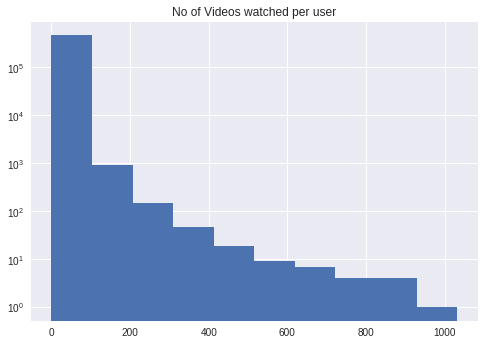

In [12]:
plt.hist(master_data['No_of_Videos_Watched'],log=True)
plt.title('No of Videos watched per user')

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()


master_data['UserId'] = le.fit_transform(master_data['UserId'])
master_data['Registered_Status']=le.fit_transform(master_data['Registered_Status'])
master_data['Last_Login_Time'] = (master_data['Last_Login_Time'] - datetime.datetime(2017, 1, 6)).dt.days


master_data.head()

,UserId,Registered_Status,No_of_Devices,No_of_Uninstalled_Device,Last_Login_Time,Last_Login_Device,Last_Login_OS,Country,State,Other_Genre,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,Concerts,Cooking,Crime,Current Affairs / General,Documentary,Drama,Entertainment,Entertainment News,Equestrian,Family,Fashion,Food,Football,Game Show,General,Golf,Hockey,Horror,Horror / Supernatural,Martial Sports,Motor Sports,Music,Musical / Opera,Mystery,Other Sports (General),Others,Reality,Reality Show,Religious,Romance,Series,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Unknown,Variety,Wrestling,Channels,Movies,TV Shows,No_of_AppLaunches,No_of_UTMLaunches,q1,q2,q3,q4,No_of_Videos_Watched,Average_visit_duration,Reinstalled,Other_video_ratio,Action _video_ratio,Adventure _video_ratio,Animation _video_ratio,Anime _video_ratio,Athletics _video_ratio,Automotive _video_ratio,Award Show _video_ratio,Badminton _video_ratio,Comedy _video_ratio,Concerts _video_ratio,Cooking _video_ratio,Crime _video_ratio,Current Affairs / General _video_ratio,Documentary _video_ratio,Drama _video_ratio,Entertainment _video_ratio,Entertainment News _video_ratio,Equestrian _video_ratio,Family _video_ratio,Fashion _video_ratio,Food _video_ratio,Football _video_ratio,Game Show _video_ratio,General _video_ratio,Golf _video_ratio,Hockey _video_ratio,Horror _video_ratio,Horror / Supernatural _video_ratio,Martial Sports _video_ratio,Motor Sports _video_ratio,Music _video_ratio,Musical / Opera _video_ratio,Mystery _video_ratio,Other Sports (General) _video_ratio,Others _video_ratio,Reality _video_ratio,Reality Show _video_ratio,Religious _video_ratio,Romance _video_ratio,Series _video_ratio,Special Event _video_ratio,Sports Magazine _video_ratio,TV Shows (General) _video_ratio,Talk Show _video_ratio,Team Sports (Excl. Football) _video_ratio,Tennis / Squash _video_ratio,Thriller _video_ratio,Travel _video_ratio,Unknown _video_ratio,Variety _video_ratio,Wrestling _video_ratio,Dormant
0,295825,0,1.0,0.0,0,1.0,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,342.0,0.0,0.0,0.0,1.0,0.0,1.0,0.040189,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
1,310721,0,1.0,0.0,54,1.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,11.173333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000727,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,449916,0,2.0,2.0,156,2.0,2.0,1.0,35.0,28.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,0.0,34.0,3.0,0.0,0.0,0.0,4.0,6.0,53.0,0.0,1.0,0.0,0.0,4.0,3.0,6.0,50.0,0.0,0.0,0.0,18.0,0.0,0.0,4.0,0.0,3.0,2.0,1.0,113.0,9.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,395.0,8.0,11.0,106.0,0.0,13.0,53.0,28.0,320.0,414.0,7.994159,1.0,1.0,0.026316,0.0,0.0,0.011254,0.0,0.0,0.0,0.333333,0.004464,0.0,0.0,0.0,0.5,0.0,0.006541,0.066667,0.0,0.0,0.0,0.25,0.5,1.0,0.0,0.5,0.0,0.0,0.028169,1.0,1.5,0.5,0.0,0.0,0.0,1.333333,0.0,0.0,0.028037,0.0,0.010526,0.5,0.5,0.6,0.6,0.0,0.0,0.333333,0.033333,0.0,0.0,0.0,0.0,0
3,8810,0,1.0,0.0,4,2.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')




columns_list = list(set(master_data.columns) - set(['UserId',
                                                    'Country','State','No_of_Devices',
                                                    'No_of_Uninstalled_Device',
                                                    'Last_Login_OS',
                                                    'Last_Login_Device','cluster_name','cluster']))

scale_columns = list(master_data.columns[9:64].values) # Genre columns with videos watched being value need to scale

scale_columns.extend(['No_of_AppLaunches','No_of_UTMLaunches','q1','q2','q3','q4','No_of_Videos_Watched','Last_Login_Time'])

mmscal= MinMaxScaler()

master_data[scale_columns]=mmscal.fit_transform(master_data[scale_columns])

pca = PCA(n_components=2,random_state=0)

pca_result = pca.fit_transform(master_data[columns_list])
#pca_result = pca.fit_transform(X)


print(np.sum(pca.explained_variance_ratio_))


0.9933503441395798


<Figure size 792x576 with 0 Axes>

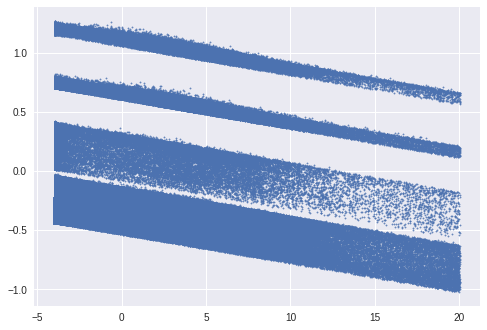

<Figure size 792x576 with 0 Axes>

In [15]:
from mpl_toolkits import mplot3d

plt.scatter(pca_result[:,0],pca_result[:,1],s=2,alpha=0.8)
plt.figure(figsize=(11,8))

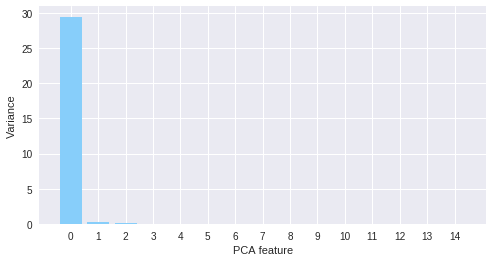

In [16]:
pca = PCA()

pca.fit(master_data[columns_list])

features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

t-SNE done! Time elapsed: 100.06584167480469 seconds


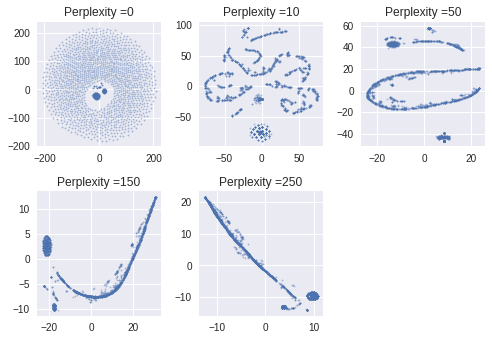

In [17]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
counter=1
plt.figure(figsize=(7,7))
for p_val in [0,10,50,150,250]:
    tsne = TSNE(n_components=2, verbose=0,perplexity=p_val )
    tsne_results = tsne.fit_transform(pca_result[:2000,:])
    plt.subplot(3,3,counter)
    plt.scatter(tsne_results[:,0],tsne_results[:,1],s=2,alpha=0.4)
    plt.title('Perplexity ='+str(p_val))
    plt.tight_layout()
    counter+=1
    
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


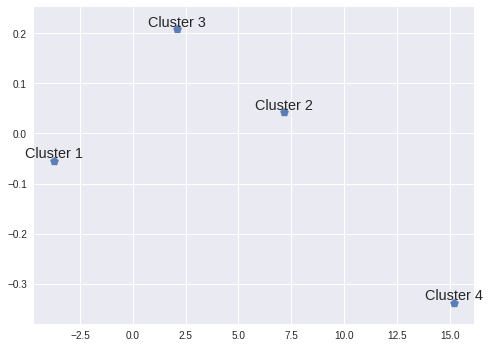

In [18]:
from sklearn.cluster import KMeans

inertia = []
counter=1
plt.figure(figsize=(7,5))
for tot_cluster in [4]:
    kmeans = KMeans(n_clusters=tot_cluster,init='random',random_state=0,max_iter=300)
    kmeans_df = kmeans.fit_transform(pca_result)
    inertia.append(kmeans.inertia_)
    plt.subplot(1,1,counter)
    counter+=1
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=75,alpha=0.9,marker='p',norm=1)
    ix=1
    for x,y in zip(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]):
        plt.text(x,y,'Cluster '+str(ix) , {'fontsize':'large','verticalalignment':'bottom','horizontalalignment':'center'} )
        ix+=1
    plt.tight_layout()
    
master_data['cluster'] = kmeans.labels_
#print(kmeans.labels_.shape)

Text(0.5, 0, 'No of clusters')

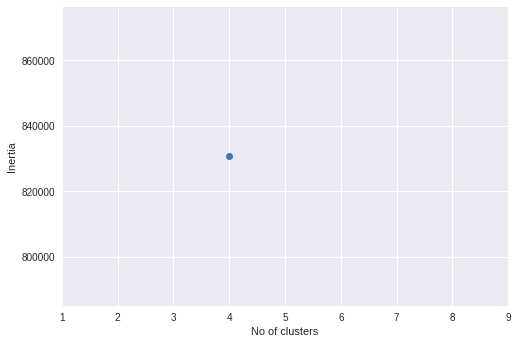

In [20]:
plt.plot(range(4,5),inertia,'-o')
plt.style.use('bmh')
plt.xticks(range(1,10))
plt.ylabel('Inertia')
plt.xlabel('No of clusters')

In [0]:
master_data.head()

In [21]:
tmp_dormant = master_data.groupby(['cluster','Dormant']).size().unstack()

tmp_dormant['Active_Percentage'] = tmp_dormant[0] / np.sum(tmp_dormant[0]) *100
tmp_dormant['Dormant_Percentage'] = tmp_dormant[1] / np.sum(tmp_dormant[1]) *100

tmp_dormant['Total Users'] = tmp_dormant[0] + tmp_dormant[1] 
tmp_dormant['User_Cluster_Percentage'] = tmp_dormant['Total Users'] / master_data.shape[0] * 100

tmp_register = master_data.groupby(['cluster','Registered_Status']).size().unstack()

tmp_register['Registered_Percentage'] = tmp_register[1] / np.sum( tmp_register[1]) * 100


cluster_stats = tmp_dormant.merge(tmp_register,left_index=True,right_index=True,suffixes=['_dormant','_registeration'])
cluster_stats = cluster_stats.merge(pd.DataFrame(master_data.groupby('cluster').sum()['No_of_Videos_Watched'] / master_data['No_of_Videos_Watched'].sum() * 100) ,how='left',left_index=True,right_index=True)

cluster_stats.sort_values(['Active_Percentage','Registered_Percentage','No_of_Videos_Watched'],ascending=False)

,0_dormant,1_dormant,Active_Percentage,Dormant_Percentage,Total Users,User_Cluster_Percentage,0_registeration,1_registeration,Registered_Percentage,No_of_Videos_Watched
cluster,,,,,,,,,,
0,45450,233978,37.865218,67.605528,279428,59.947139,243722,35706,38.823952,12.209021
2,40438,53870,33.689630,15.565180,94308,20.232385,63690,30618,33.291653,65.720618
1,28010,42181,23.335638,12.187765,70191,15.058439,48908,21283,23.141493,20.663591
3,6133,16064,5.109513,4.641527,22197,4.762038,17835,4362,4.742902,1.406770


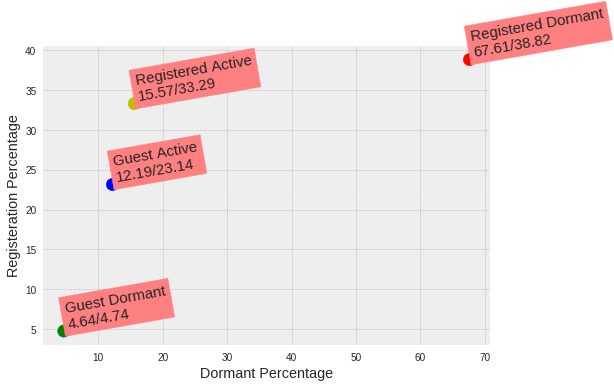

In [22]:
cluster_classification = { 0: 'Registered Dormant' ,
                           1: 'Guest Active',
                           2: 'Registered Active',
                           3: 'Guest Dormant'     
                         }


plt.scatter(cluster_stats['Dormant_Percentage'],cluster_stats['Registered_Percentage'],c=['r','b','y','g'],s=150)
plt.xlabel('Dormant Percentage')
plt.ylabel('Registeration Percentage')
counter=0
for x,y in zip(cluster_stats['Dormant_Percentage'],cluster_stats['Registered_Percentage']):
  plt.text(x,y,cluster_classification.get(counter) +'\n' + '{:.2f}'.format(x) + '/{:.2f}'.format(y),horizontalalignment='left',rotation=10., verticalalignment='bottom',size=15,bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.5, 0.5),
                   ))
  counter+=1

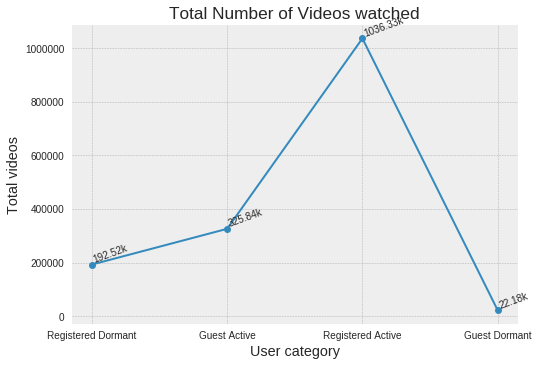

In [23]:
master_data[scale_columns]=mmscal.inverse_transform(master_data[scale_columns])

plt.plot( list(cluster_classification.values()),(master_data.groupby('cluster').sum()['No_of_Videos_Watched'] ),'-o')
plt.title('Total Number of Videos watched')
plt.xlabel('User category')
plt.ylabel('Total videos')

for x,y in zip( list(cluster_classification.values()),(master_data.groupby('cluster').sum()['No_of_Videos_Watched'] ) ):
    plt.text(x,y,'{:.2f}k'.format(y/1000),horizontalalignment='left',rotation=20., verticalalignment='bottom',size=10)

master_data[scale_columns]=mmscal.fit_transform(master_data[scale_columns])

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(master_data.drop(['cluster'],axis=1), master_data['cluster'], test_size=0.30, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(pca_result, master_data['cluster'], test_size=0.20, random_state=0)

print('Train shape ',x_train.shape)
print('Test shape ',x_test.shape)

y_train.value_counts()

Train shape  (326286, 126)
Test shape  (139838, 126)


0    195761
2     65780
1     49236
3     15509
Name: cluster, dtype: int64

In [27]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

x_train, y_train = rus.fit_resample(x_train, y_train)

x_train = pd.DataFrame(x_train,columns=master_data.drop(['cluster'],axis=1).columns)
y_train = pd.Series(y_train)

y_train.value_counts()

3    15509
2    15509
1    15509
0    15509
dtype: int64

In [31]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB 


def apply_classifier(clf,clf_name):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print('For ',clf_name)
  print('*'*60)
  print(classification_report(y_test,y_pred,target_names=list(cluster_classification.values())))
  return f1_score(y_test,y_pred,labels=range(0,4),average='weighted')

f1_scores={}

f1_scores['LogisticRegression']= apply_classifier(LogisticRegression(random_state=0,multi_class='multinomial',solver='lbfgs'),'Logistic Regression')
f1_scores['NaiveBayes']= apply_classifier(GaussianNB(),'Gaussian Naive Bayes Classifier')
f1_scores['DecisionTree']= apply_classifier(tree.DecisionTreeClassifier(),'Decision Tree')

print(f1_scores)

For  Logistic Regression
************************************************************
                    precision    recall  f1-score   support

Registered Dormant       0.60      1.00      0.75     83667
      Guest Active       0.75      0.00      0.00     20955
 Registered Active       0.00      0.00      0.00     28528
     Guest Dormant       0.00      0.00      0.00      6688

         micro avg       0.60      0.60      0.60    139838
         macro avg       0.34      0.25      0.19    139838
      weighted avg       0.47      0.60      0.45    139838

For  Gaussian Naive Bayes Classifier
************************************************************
                    precision    recall  f1-score   support

Registered Dormant       0.89      1.00      0.94     83667
      Guest Active       0.82      0.67      0.74     20955
 Registered Active       0.77      0.67      0.72     28528
     Guest Dormant       0.99      0.53      0.69      6688

         micro avg       0.86  

In [70]:
import math

clf = tree.DecisionTreeClassifier()

clf.fit(x_train,y_train)

feature_imp_list = pd.Series([ '{:.5f}'.format(abs(rec))  for rec in clf.feature_importances_])

feature_df = pd.concat([feature_imp_list,pd.Series(x_train.columns)], axis=1)

feature_df.columns= ['feature_imp','feature_name']

feature_df.sort_values('feature_imp',ascending=False).iloc[:10]

,feature_imp,feature_name
71,0.99762,Average_visit_duration
125,0.00147,Dormant
4,0.00050,Last_Login_Time
1,0.00026,Registered_Status
13,0.00002,Anime
88,0.00002,Drama _video_ratio
70,0.00002,No_of_Videos_Watched
61,0.00002,Channels
74,0.00001,Action _video_ratio
68,0.00001,q3


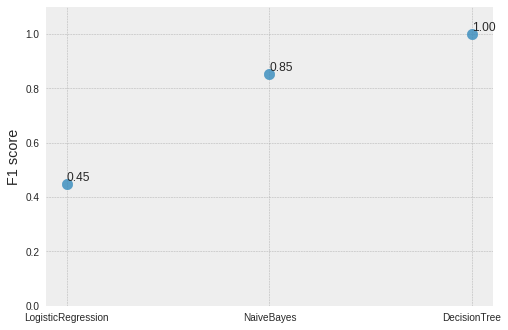

In [71]:
f1_scores = pd.Series(f1_scores).sort_values()

plt.scatter(f1_scores.index,f1_scores.values,alpha=0.8,s=110)
plt.ylabel('F1 score')
plt.ylim((0,1.1))
for x,y in zip(f1_scores.index,f1_scores.values):
    plt.text(x,y,'{:.2f}'.format(float(y)),verticalalignment='bottom',horizontalalignment='left' )